In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


df = pd.read_csv('pizza_sales.csv')

# Chuyển đổi cột 'order_date' sang định dạng datetime
# '%d-%m-%Y' tương ứng với định dạng 'ngày-tháng-năm'
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')
df.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


In [7]:
# --- A. Các chỉ số hiệu suất chính (KPIs) ---
print('A. Các chỉ số hiệu suất chính (KPIs)')

total_revenue = df['total_price'].sum()
print(f"Tổng Doanh thu: ${total_revenue:,.2f}")

total_orders = df['order_id'].nunique()
print(f"Tổng số Đơn hàng: {total_orders:,}")

total_pizzas_sold = df['quantity'].sum()
print(f"Tổng số Pizza đã bán: {total_pizzas_sold:,}")

avg_order_value = total_revenue / total_orders
print(f"Giá trị Đơn hàng Trung bình: ${avg_order_value:,.2f}")

avg_pizzas_per_order = total_pizzas_sold / total_orders
print(f"Số Pizza Trung bình mỗi Đơn hàng: {avg_pizzas_per_order:.2f}")

A. Các chỉ số hiệu suất chính (KPIs)
Tổng Doanh thu: $817,860.05
Tổng số Đơn hàng: 21,350
Tổng số Pizza đã bán: 49,574
Giá trị Đơn hàng Trung bình: $38.31
Số Pizza Trung bình mỗi Đơn hàng: 2.32


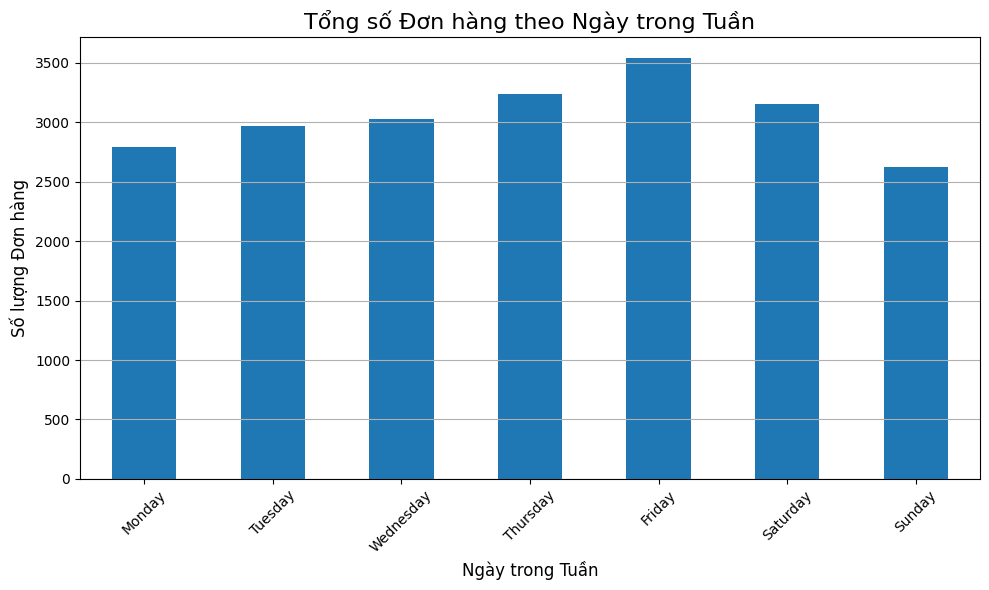

In [8]:
# B. Biểu đồ xu hướng đặt hàng theo ngày trong tuần ---
df['day_of_week'] = df['order_date'].dt.day_name()

# Sắp xếp các ngày theo đúng thứ tự trong tuần
daily_orders = df.groupby('day_of_week')['order_id'].nunique().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 6))
daily_orders.plot(kind='bar')
plt.title('Tổng số Đơn hàng theo Ngày trong Tuần', fontsize=16)
plt.xlabel('Ngày trong Tuần', fontsize=12)
plt.ylabel('Số lượng Đơn hàng', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

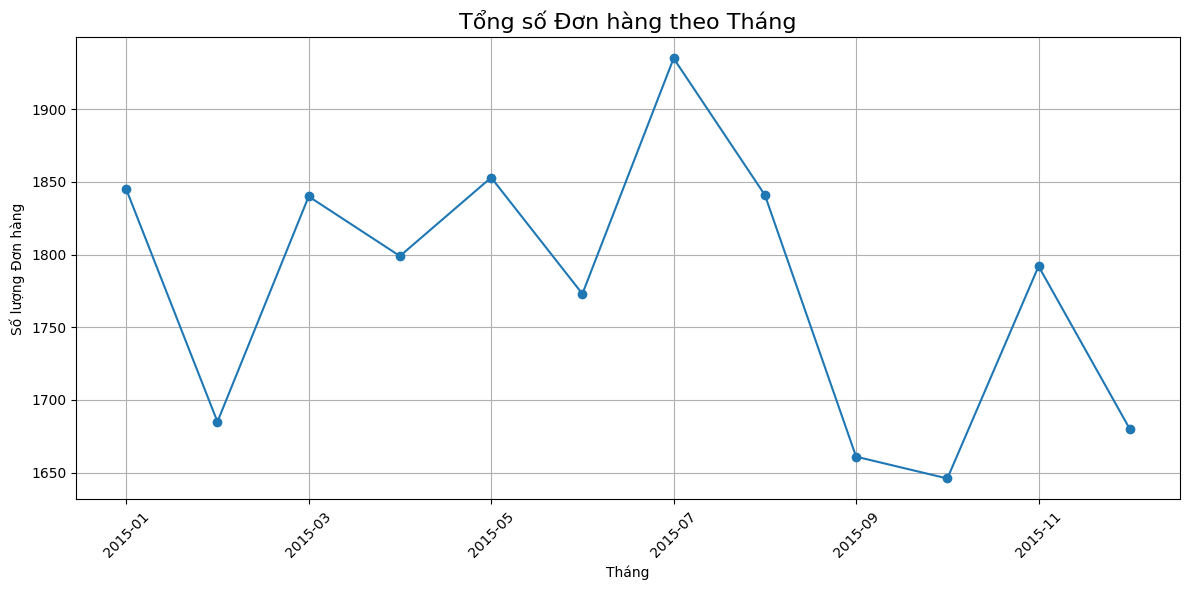

In [9]:
# C. Biểu đồ xu hướng đặt hàng theo tháng ---
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_orders = df.groupby('order_month')['order_id'].nunique()
monthly_orders.index = monthly_orders.index.strftime('%Y-%m') # Chuyển đổi index để hiển thị đẹp hơn

plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Tổng số Đơn hàng theo Tháng', fontsize=16)
plt.xlabel('Tháng')
plt.ylabel('Số lượng Đơn hàng')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



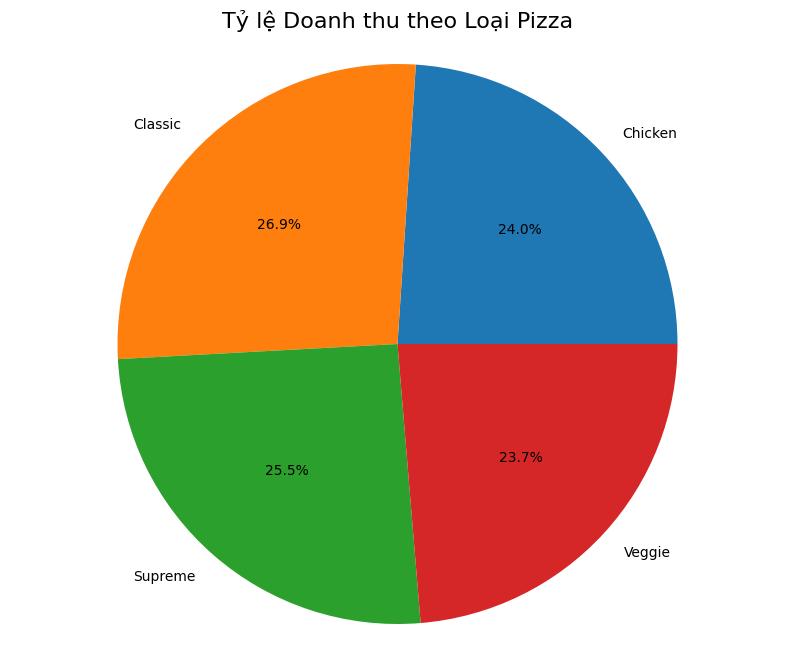

In [10]:
# D. Biểu đồ tròn: Tỷ lệ Doanh thu theo Loại Pizza ---
category_sales = df.groupby('pizza_category')['total_price'].sum()

plt.figure(figsize=(10, 8))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tỷ lệ Doanh thu theo Loại Pizza', fontsize=16)
plt.ylabel('') 
plt.axis('equal')
plt.show()

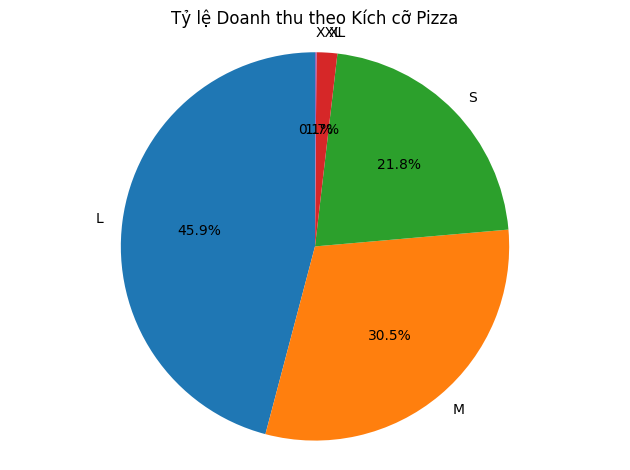

In [11]:
# E.Tỷ lệ Doanh thu theo Kích cỡ Pizza
size_sales = df.groupby('pizza_size')['total_price'].sum()

size_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ Doanh thu theo Kích cỡ Pizza')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

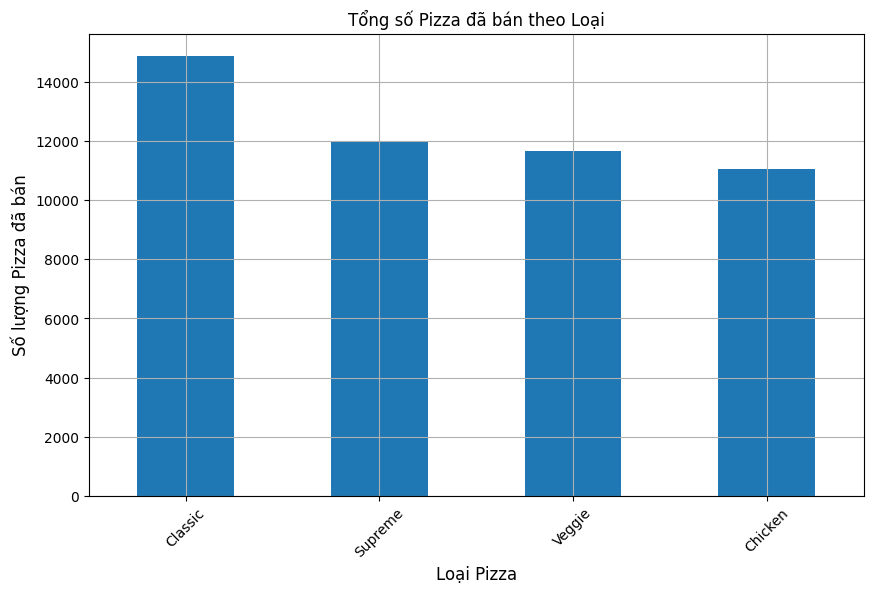

In [12]:
# F. Biểu đồ cột: Tổng số Pizza đã bán theo Loại ---
category_quantity = df.groupby('pizza_category')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_quantity.plot(kind='bar')
plt.title('Tổng số Pizza đã bán theo Loại')
plt.xlabel('Loại Pizza', fontsize=12)
plt.ylabel('Số lượng Pizza đã bán', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [13]:
# Hàm trợ giúp để vẽ biểu đồ ngang cho Top/Bottom 5
def plot_horizontal_bar(data, title, xlabel, color='c'):
    plt.figure(figsize=(12, 8))
    data_sorted = data.sort_values()
    bars = data_sorted.plot(kind='barh', color=color)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Tên Pizza', fontsize=12)
    plt.grid()
    
    # Thêm nhãn số liệu vào cuối mỗi thanh
    for bar in bars.patches:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f' {bar.get_width():,.0f}', va='center')
    
    plt.tight_layout()
    plt.show()

Top 5 Pizza theo Doanh thu 
pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float64


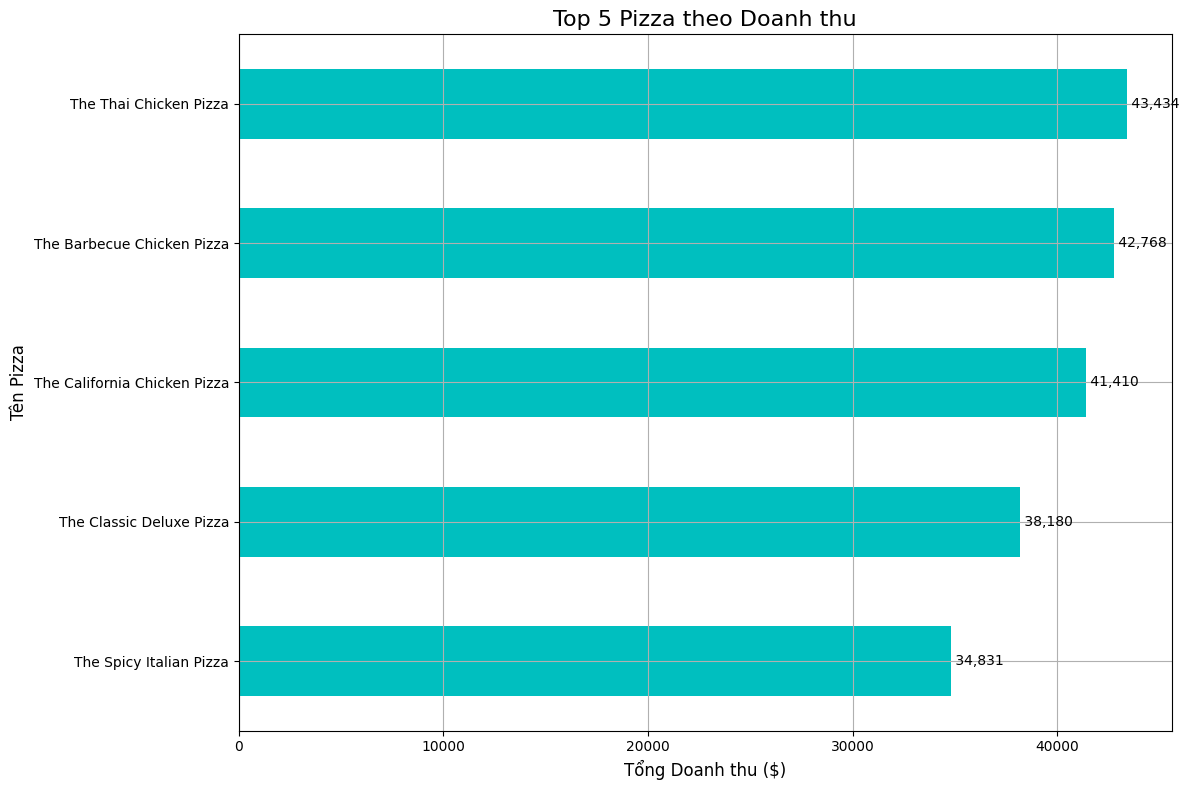


Bottom 5 Pizza theo Doanh thu
pizza_name
The Brie Carre Pizza         11588.50
The Green Garden Pizza       13955.75
The Spinach Supreme Pizza    15277.75
The Mediterranean Pizza      15360.50
The Spinach Pesto Pizza      15596.00
Name: total_price, dtype: float64


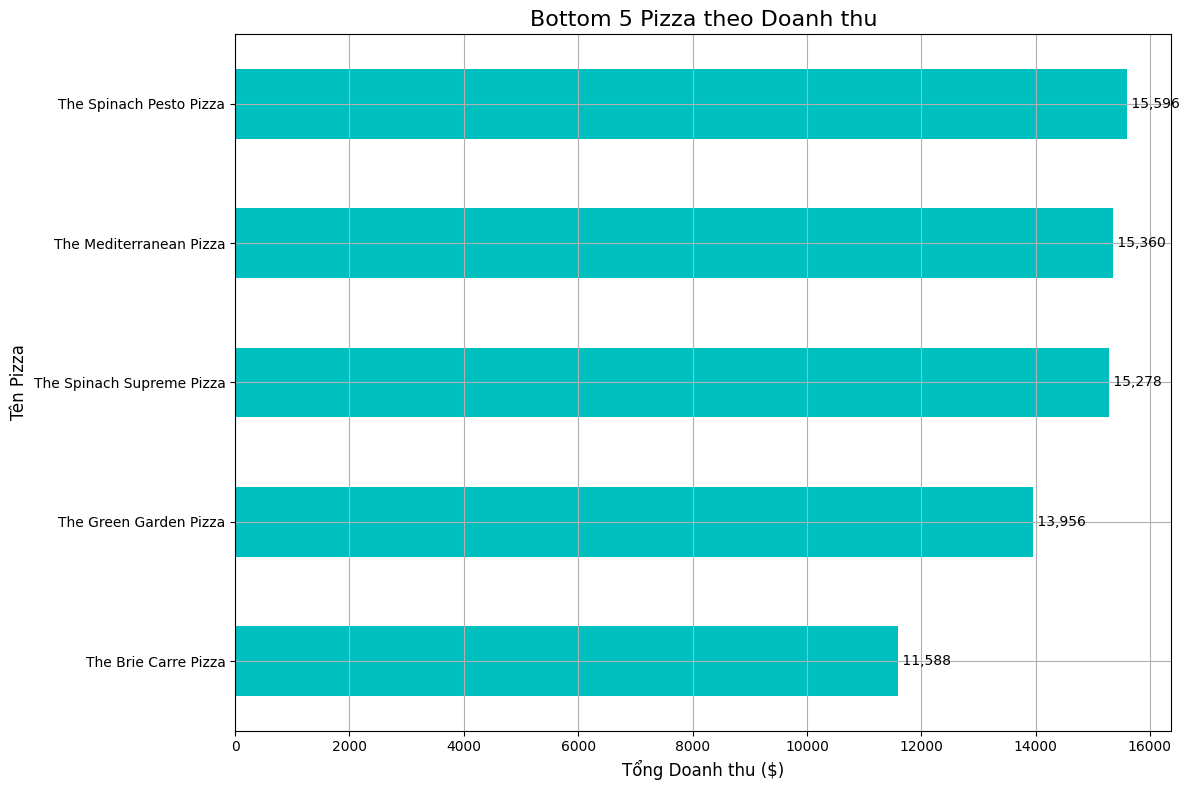

In [14]:
# G. Top 5 Pizza theo Doanh thu ---
top5_revenue = df.groupby('pizza_name')['total_price'].sum().nlargest(5)
print("Top 5 Pizza theo Doanh thu ")
print(top5_revenue)
plot_horizontal_bar(top5_revenue, 'Top 5 Pizza theo Doanh thu', 'Tổng Doanh thu ($)')

# H. Bottom 5 Pizza theo Doanh thu
bottom5_revenue = df.groupby('pizza_name')['total_price'].sum().nsmallest(5)
print("\nBottom 5 Pizza theo Doanh thu")
print(bottom5_revenue)
plot_horizontal_bar(bottom5_revenue, 'Bottom 5 Pizza theo Doanh thu', 'Tổng Doanh thu ($)')

Top 5 Pizza theo Số lượng bán
pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


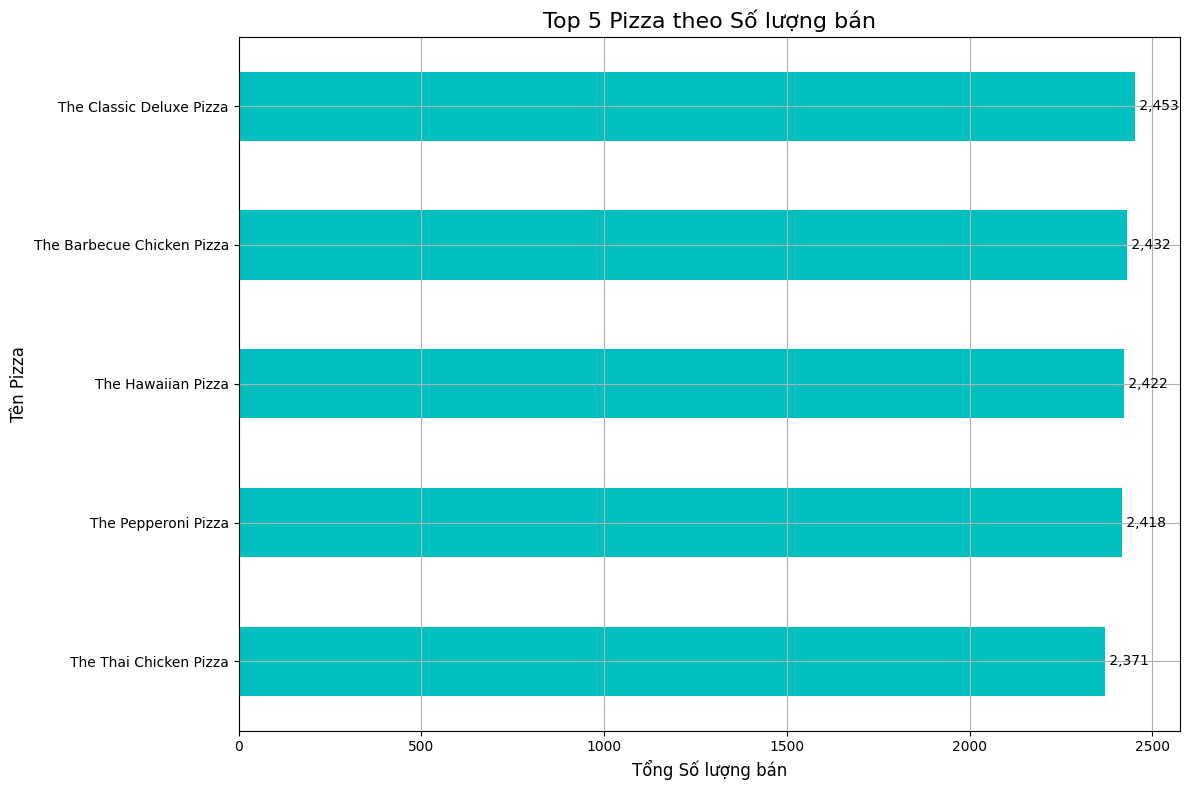


Bottom 5 Pizza theo Số lượng bán 
pizza_name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


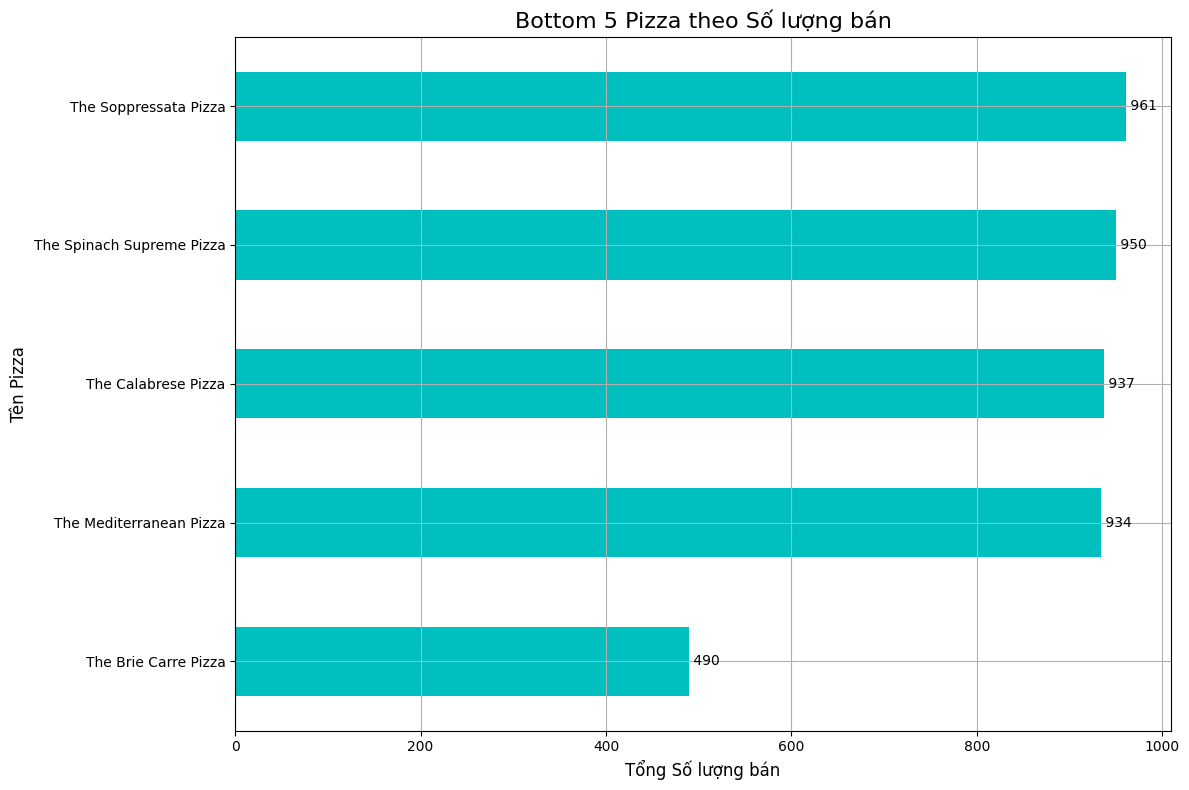

In [15]:
# I. Top 5 Pizza theo Số lượng bán 
top5_quantity = df.groupby('pizza_name')['quantity'].sum().nlargest(5)
print("Top 5 Pizza theo Số lượng bán")
print(top5_quantity)
plot_horizontal_bar(top5_quantity, 'Top 5 Pizza theo Số lượng bán', 'Tổng Số lượng bán')

# J. Bottom 5 Pizza theo Số lượng bán
bottom5_quantity = df.groupby('pizza_name')['quantity'].sum().nsmallest(5)
print("\nBottom 5 Pizza theo Số lượng bán ")
print(bottom5_quantity)
plot_horizontal_bar(bottom5_quantity, 'Bottom 5 Pizza theo Số lượng bán', 'Tổng Số lượng bán')

Top 5 Pizza theo Tổng số Đơn hàng 
pizza_name
The Classic Deluxe Pizza      2329
The Hawaiian Pizza            2280
The Pepperoni Pizza           2278
The Barbecue Chicken Pizza    2273
The Thai Chicken Pizza        2225
Name: order_id, dtype: int64


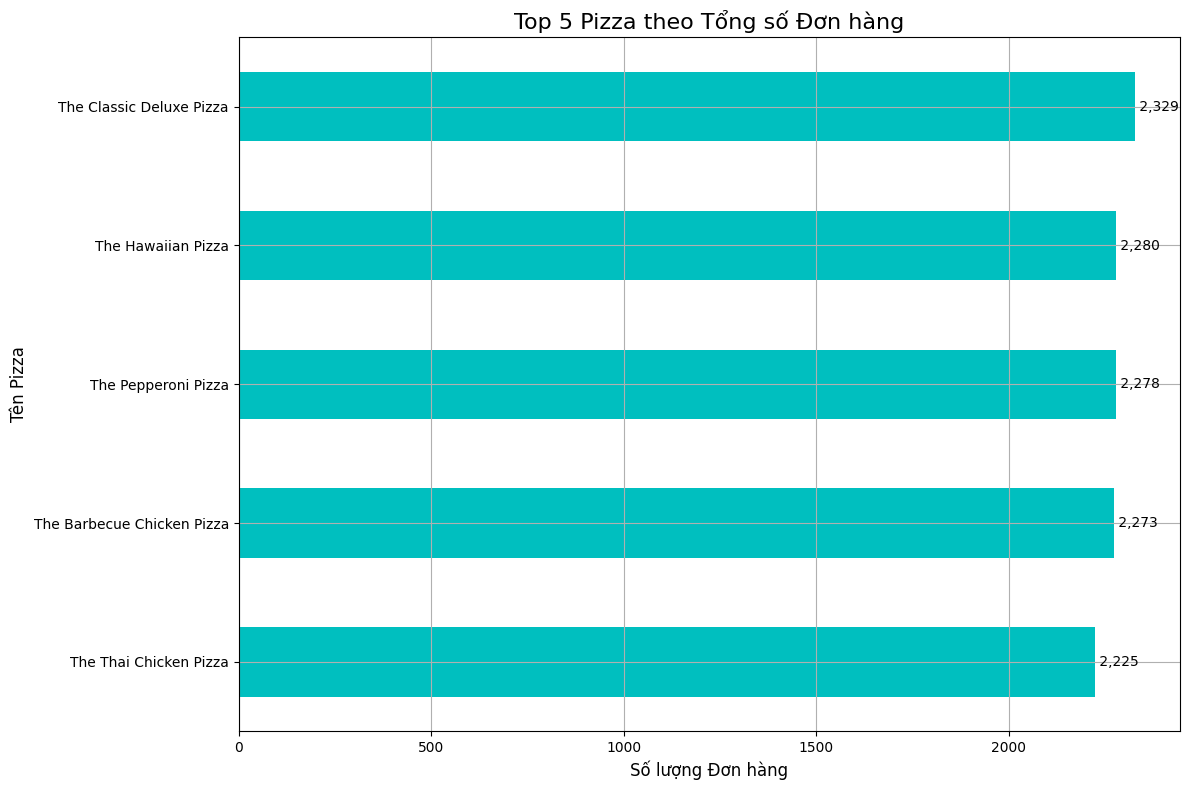


Bottom 5 Pizza theo Tổng số Đơn hàng
pizza_name
The Brie Carre Pizza         480
The Mediterranean Pizza      912
The Calabrese Pizza          918
The Spinach Supreme Pizza    918
The Chicken Pesto Pizza      938
Name: order_id, dtype: int64


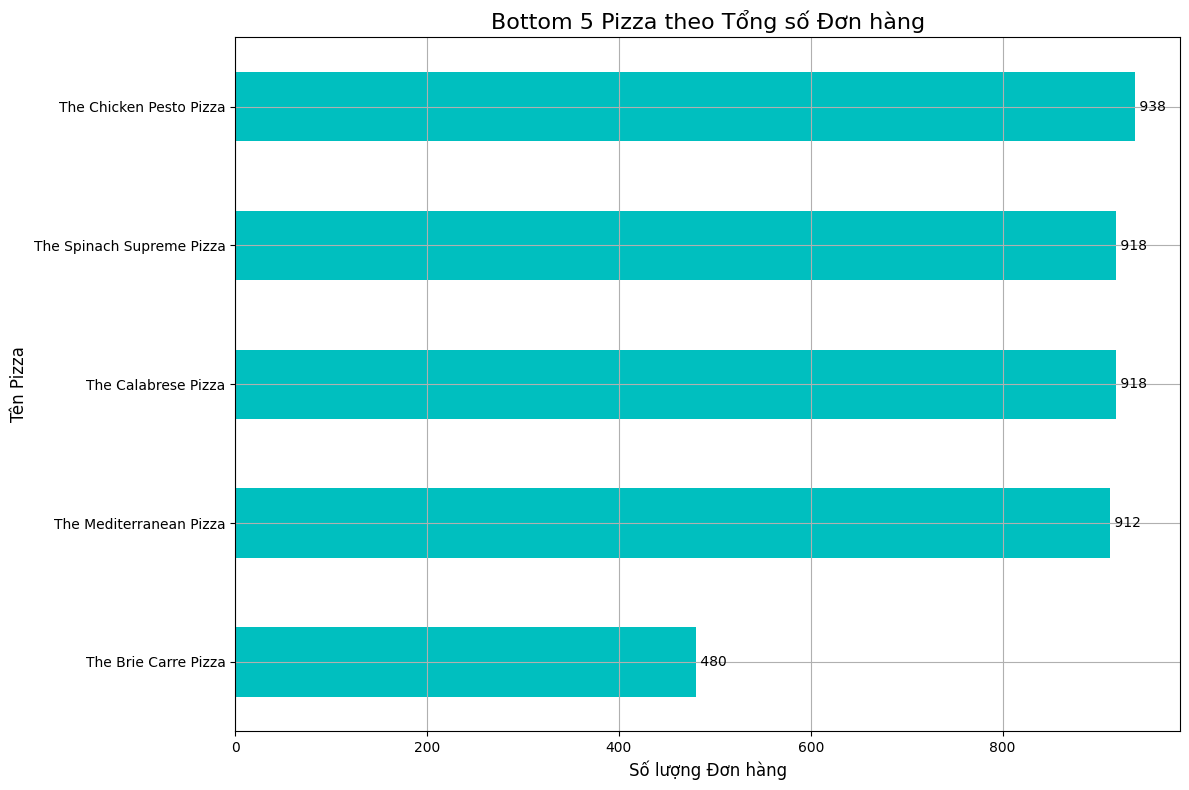

In [16]:
# K. Top 5 Pizza theo Tổng số đơn hàng
top5_orders = df.groupby('pizza_name')['order_id'].nunique().nlargest(5)
print("Top 5 Pizza theo Tổng số Đơn hàng ")
print(top5_orders)
plot_horizontal_bar(top5_orders, 'Top 5 Pizza theo Tổng số Đơn hàng', 'Số lượng Đơn hàng')

# L. Bottom 5 Pizza theo Tổng số đơn hàng
bottom5_orders = df.groupby('pizza_name')['order_id'].nunique().nsmallest(5)
print("\nBottom 5 Pizza theo Tổng số Đơn hàng")
print(bottom5_orders)
plot_horizontal_bar(bottom5_orders, 'Bottom 5 Pizza theo Tổng số Đơn hàng', 'Số lượng Đơn hàng')